In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# 讀取資料
df = pd.read_csv('L14_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,14,2024-02-14 15:22:05.000,3.05,1012.37,27.36,44.77,54612.50,1154.19
1,14,2024-02-14 15:23:05.000,1.22,1012.36,28.26,42.89,71763.59,1140.83
2,14,2024-02-14 15:24:05.000,0.44,1012.42,29.23,40.58,71445.55,1132.58
3,14,2024-02-14 15:25:05.000,1.39,1012.43,29.19,40.73,71073.59,1119.11
4,14,2024-02-14 15:26:05.000,1.05,1012.40,29.19,41.09,70363.83,1104.13
...,...,...,...,...,...,...,...,...
66146,14,2024-07-18 16:50:07.000,0.00,1003.65,35.99,59.88,4476.67,5.60
66147,14,2024-07-18 16:51:07.000,0.00,1003.69,36.02,59.80,4447.50,5.58
66148,14,2024-07-18 16:52:07.000,0.00,1003.67,35.88,60.63,4416.67,5.50
66149,14,2024-07-18 16:53:07.000,0.00,1003.75,35.77,61.13,4285.83,5.07


In [5]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,66151.0,66151.000000,66151.000000,66151.000000,66151.000000,66151.000000,66151.000000
mean,14.0,0.260400,1008.141074,29.371746,70.772590,23995.107183,300.555658
std,0.0,0.578231,5.322622,8.005847,23.184205,27335.168459,513.563991
min,14.0,0.000000,993.290000,13.690000,18.030000,20.000000,0.000000
25%,14.0,0.000000,1003.870000,22.960000,51.760000,4017.500000,4.130000
50%,14.0,0.000000,1007.470000,28.630000,72.280000,12395.000000,41.020000
75%,14.0,0.170000,1012.330000,35.050000,93.540000,36667.080000,314.720000
max,14.0,5.920000,1020.660000,50.860000,100.000000,117758.200000,2568.350000


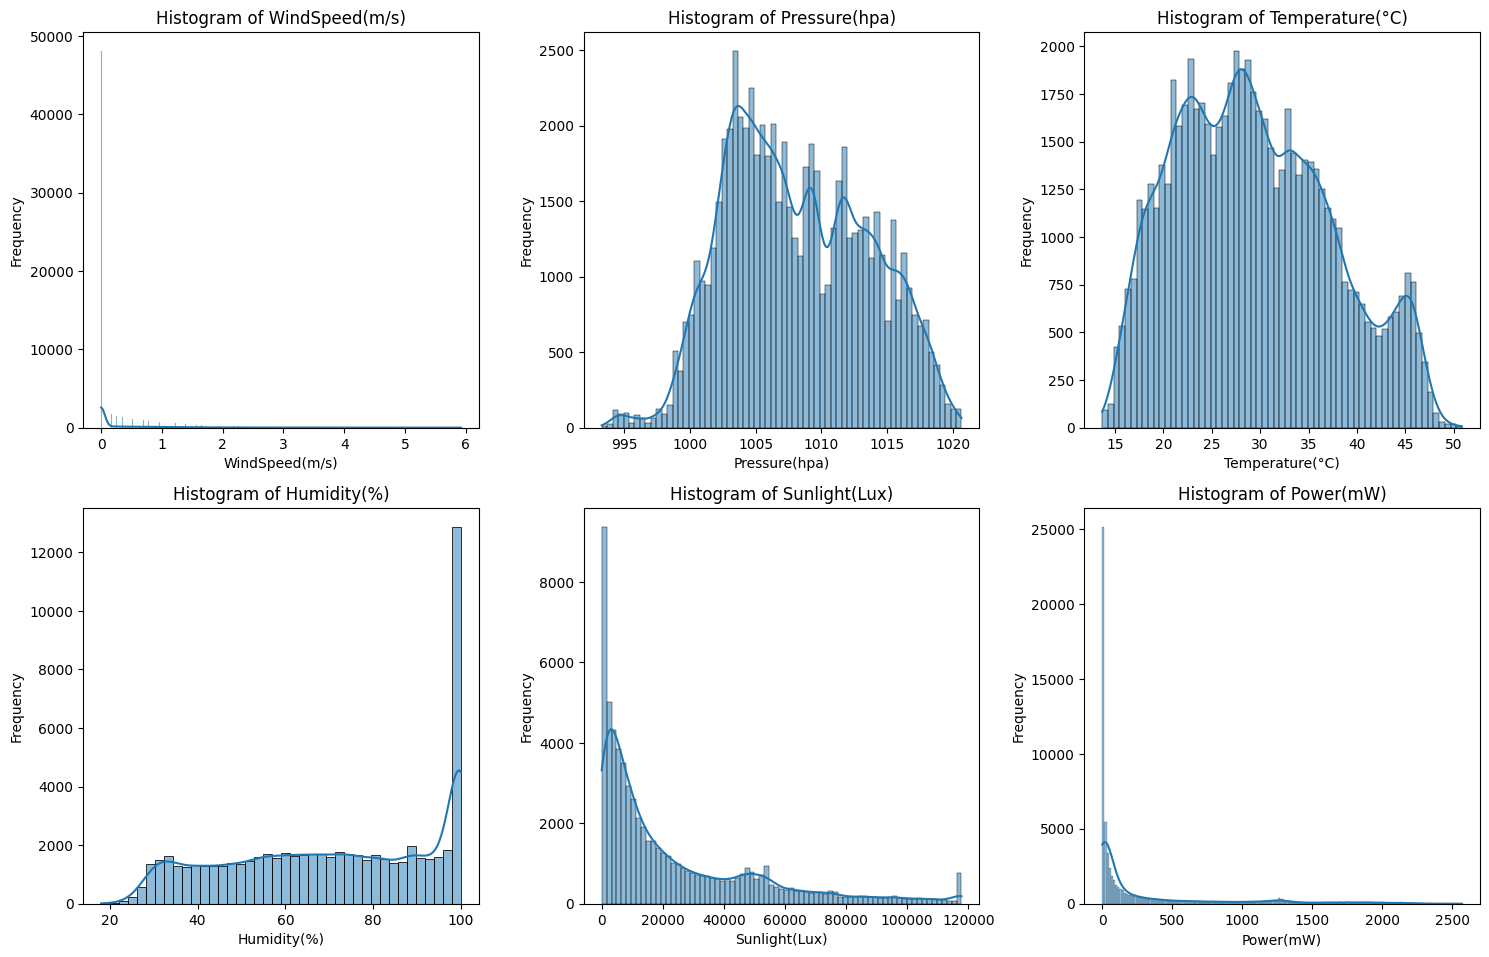

In [6]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
366,14,2024-02-15 10:49:09.000,0.26,1013.41,32.67,28.55,117758.2,1994.30
369,14,2024-02-15 10:52:09.000,0.70,1013.35,34.20,26.22,117758.2,1975.27
381,14,2024-02-15 11:04:09.000,1.48,1013.13,36.05,24.27,117758.2,1992.67
382,14,2024-02-15 11:05:09.000,2.96,1013.15,35.71,24.96,117758.2,2033.63
383,14,2024-02-15 11:06:09.000,3.05,1013.09,35.16,25.98,117758.2,2051.45
...,...,...,...,...,...,...,...,...
49235,14,2024-05-31 13:12:29.000,0.00,1003.15,34.36,100.00,117758.2,2061.70
49237,14,2024-05-31 13:14:28.000,0.00,1003.24,34.09,100.00,117758.2,2056.49
49949,14,2024-06-01 11:14:09.000,0.00,1005.74,40.69,75.40,117758.2,1902.52
49951,14,2024-06-01 11:16:10.000,0.00,1005.74,41.24,67.06,117758.2,1924.94


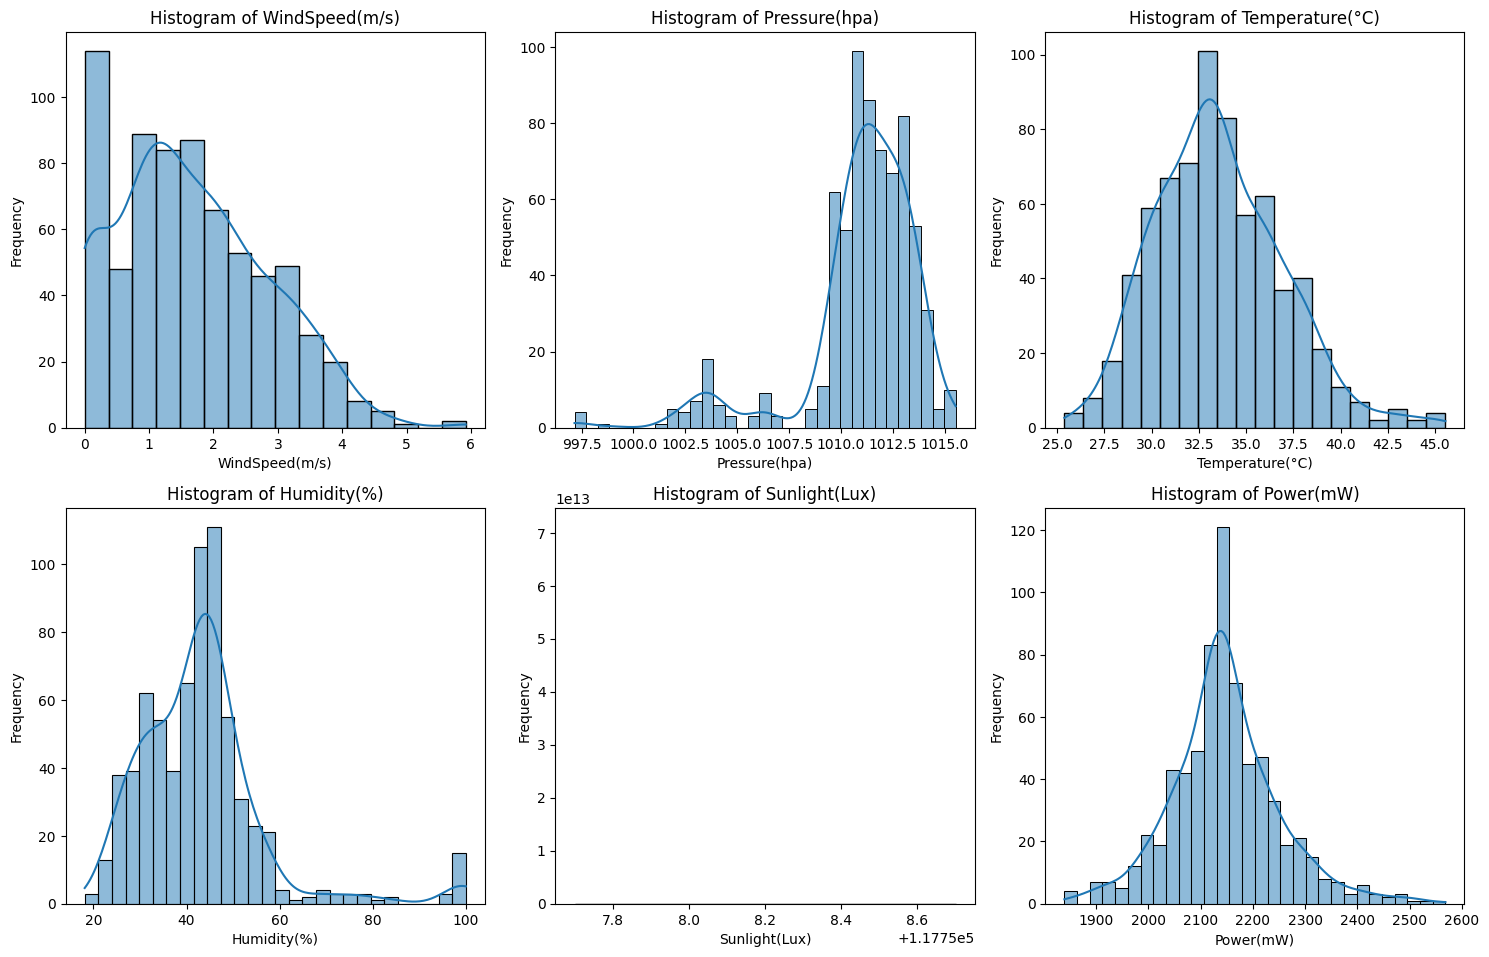

In [8]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0176 * Sunlight(Lux) + -122.9669


In [10]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0176
intercept = -122.9669

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [11]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,66151.0,66151.000000,66151.000000,66151.000000,66151.000000,66151.000000,66151.000000
mean,14.0,0.260400,1008.141074,29.371746,70.772590,24113.635897,300.555658
std,0.0,0.578231,5.322622,8.005847,23.184205,27769.031589,513.563991
min,14.0,0.000000,993.290000,13.690000,18.030000,20.000000,0.000000
25%,14.0,0.000000,1003.870000,22.960000,51.760000,4017.500000,4.130000
50%,14.0,0.000000,1007.470000,28.630000,72.280000,12395.000000,41.020000
75%,14.0,0.170000,1012.330000,35.050000,93.540000,36667.080000,314.720000
max,14.0,5.920000,1020.660000,50.860000,100.000000,152915.732955,2568.350000


In [12]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [13]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240214152214,1.10,1012.42,29.39,40.16,68443.69,1100.60
1,20240214153214,0.99,1012.45,29.95,39.14,64541.77,960.03
2,20240214154214,1.30,1012.39,27.81,44.89,57997.19,806.82
3,20240214155214,1.34,1012.48,27.31,46.32,35584.15,372.76
4,20240214160214,0.95,1012.55,27.44,46.32,44342.82,500.39
...,...,...,...,...,...,...,...
6611,20240718161414,0.00,1003.71,37.17,54.60,9988.67,41.14
6612,20240718162414,0.00,1003.74,36.77,56.50,6032.50,13.20
6613,20240718163414,0.00,1003.74,35.76,61.23,4621.83,6.26
6614,20240718164414,0.00,1003.70,35.91,60.40,4561.67,6.00


# HEATMAP

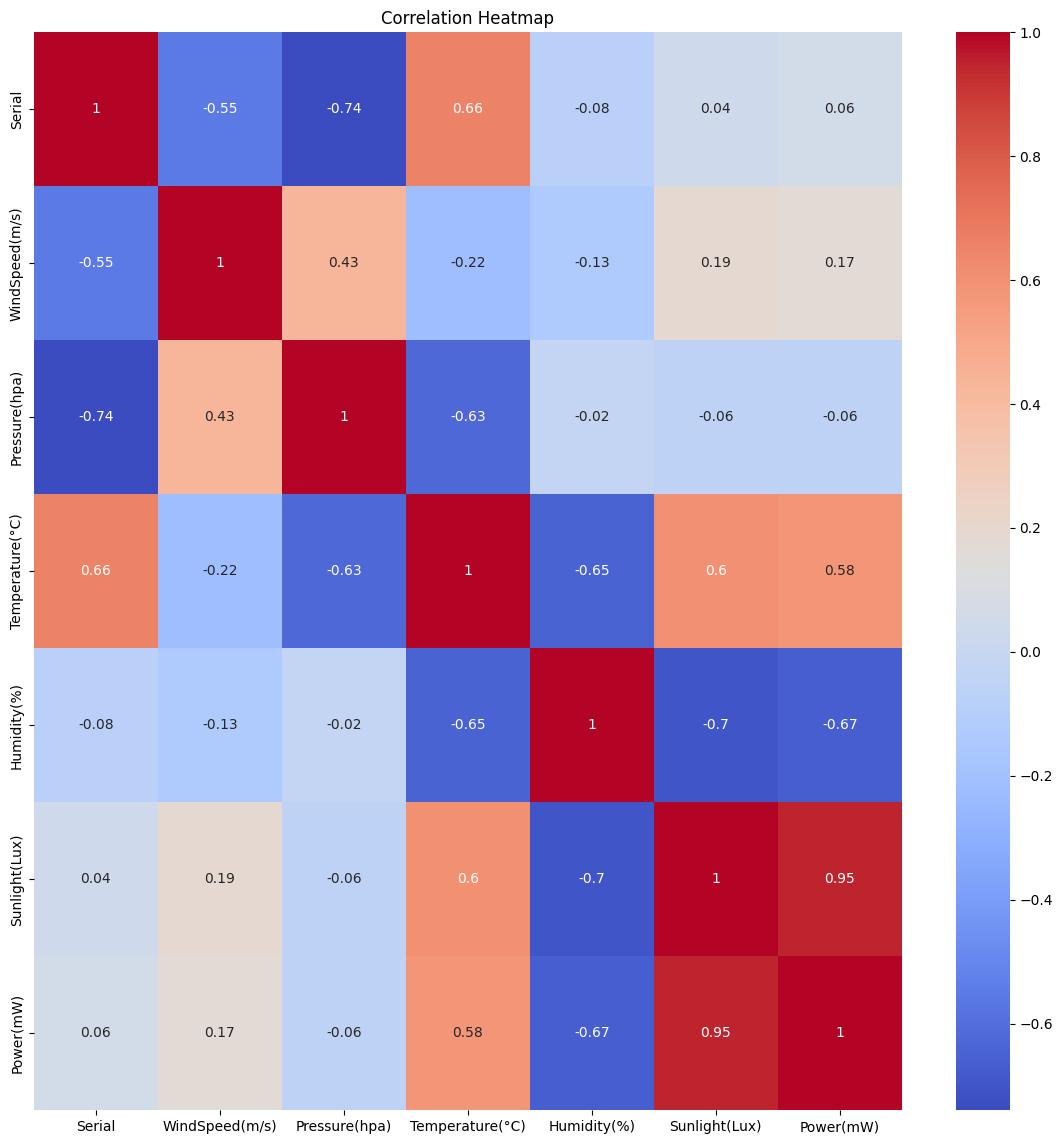

In [14]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.952456
Humidity(%)        0.666907
Temperature(°C)    0.580773
WindSpeed(m/s)     0.174470
Pressure(hpa)      0.064563
Serial             0.060667
Name: Power(mW), dtype: float64

In [16]:
df.to_csv('L14_Train_Revise.csv', index=False)